In [72]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("dataset/dataset_tcc_final.csv")
data["dataNotif"]=pd.to_datetime(data["dataNotif"], format='%d/%m/%Y')

In [3]:
data_resumo = data.groupby(['dataNotif','estacao']).sum().reset_index()
data_resumo.drop(['lat'],axis=1,inplace=True)
data_resumo.drop(['long'],axis=1,inplace=True)
data_resumo.head()

,dataNotif,estacao,ocupacaoSuspeitoCli,ocupacaoSuspeitoUti,ocupacaoConfirmadoCli,ocupacaoConfirmadoUti,saidaSuspeitaObitos,saidaSuspeitaAltas,saidaConfirmadaObitos,saidaConfirmadaAltas
0,2020-01-04,VERAO,113.0,70.0,34.0,25.0,0,1,0,3
1,2020-02-07,VERAO,13.0,0.0,0.0,0.0,0,0,0,0
2,2020-03-20,VERAO,5.0,0.0,0.0,0.0,0,0,0,0
3,2020-04-01,OUTONO,376.0,137.0,43.0,39.0,0,1,5,10
4,2020-04-02,OUTONO,349.0,109.0,42.0,23.0,0,5,2,13


In [4]:
data_resumo.isnull().sum()

dataNotif                0
estacao                  0
ocupacaoSuspeitoCli      0
ocupacaoSuspeitoUti      0
ocupacaoConfirmadoCli    0
ocupacaoConfirmadoUti    0
saidaSuspeitaObitos      0
saidaSuspeitaAltas       0
saidaConfirmadaObitos    0
saidaConfirmadaAltas     0
dtype: int64

<AxesSubplot:title={'center':'Análise Ocupações'}, xlabel='Dias'>

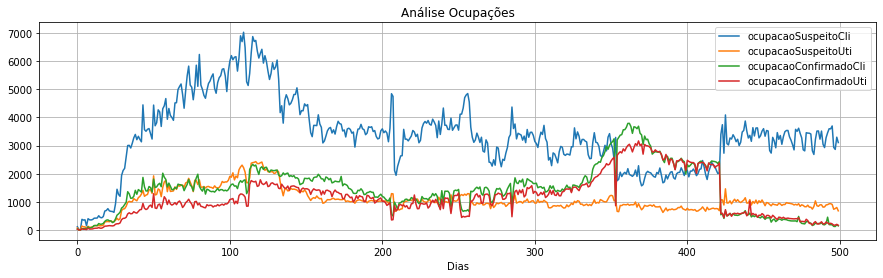

In [5]:
data_resumo[['ocupacaoSuspeitoCli', 'ocupacaoSuspeitoUti','ocupacaoConfirmadoCli','ocupacaoConfirmadoUti']].plot(figsize=(15, 4), xlabel='Dias', title='Análise Ocupações', grid=True)

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [7]:
labelencoder_X = LabelEncoder()
data_resumo["estacao_cat"] = labelencoder_X.fit_transform(data_resumo.iloc[:, 1])
data_resumo.head()

,dataNotif,estacao,ocupacaoSuspeitoCli,ocupacaoSuspeitoUti,ocupacaoConfirmadoCli,ocupacaoConfirmadoUti,saidaSuspeitaObitos,saidaSuspeitaAltas,saidaConfirmadaObitos,saidaConfirmadaAltas,estacao_cat
0,2020-01-04,VERAO,113.0,70.0,34.0,25.0,0,1,0,3,3
1,2020-02-07,VERAO,13.0,0.0,0.0,0.0,0,0,0,0,3
2,2020-03-20,VERAO,5.0,0.0,0.0,0.0,0,0,0,0,3
3,2020-04-01,OUTONO,376.0,137.0,43.0,39.0,0,1,5,10,1
4,2020-04-02,OUTONO,349.0,109.0,42.0,23.0,0,5,2,13,1


In [8]:
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(data_resumo[['estacao_cat']]).toarray())
enc_df

,0,1,2,3
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
495,1.0,0.0,0.0,0.0
496,1.0,0.0,0.0,0.0
497,1.0,0.0,0.0,0.0
498,1.0,0.0,0.0,0.0


In [9]:
data_resumo = data_resumo.join(enc_df)
data_resumo

,dataNotif,estacao,ocupacaoSuspeitoCli,ocupacaoSuspeitoUti,ocupacaoConfirmadoCli,ocupacaoConfirmadoUti,saidaSuspeitaObitos,saidaSuspeitaAltas,saidaConfirmadaObitos,saidaConfirmadaAltas,estacao_cat,0,1,2,3
0,2020-01-04,VERAO,113.0,70.0,34.0,25.0,0,1,0,3,3,0.0,0.0,0.0,1.0
1,2020-02-07,VERAO,13.0,0.0,0.0,0.0,0,0,0,0,3,0.0,0.0,0.0,1.0
2,2020-03-20,VERAO,5.0,0.0,0.0,0.0,0,0,0,0,3,0.0,0.0,0.0,1.0
3,2020-04-01,OUTONO,376.0,137.0,43.0,39.0,0,1,5,10,1,0.0,1.0,0.0,0.0
4,2020-04-02,OUTONO,349.0,109.0,42.0,23.0,0,5,2,13,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2021-08-06,INVERNO,3697.0,906.0,181.0,214.0,1,9,5,32,0,1.0,0.0,0.0,0.0
496,2021-08-07,INVERNO,2936.0,734.0,125.0,168.0,1,1,5,13,0,1.0,0.0,0.0,0.0
497,2021-08-08,INVERNO,2863.0,760.0,121.0,170.0,2,8,131,7,0,1.0,0.0,0.0,0.0
498,2021-08-09,INVERNO,3298.0,798.0,183.0,199.0,3,12,4,16,0,1.0,0.0,0.0,0.0


In [10]:
#remover coluna de tipos de estacao
data_resumo.drop(columns=['estacao_cat'], inplace=True)

In [11]:
#renomear colunas
data_resumo.rename(columns={3: "estacao_verao", 1: "estacao_outono", 0:"estacao_inverno",2:"estacao_primavera"}, inplace=True)

In [12]:
#remover coluna original estacao
data_resumo.drop(columns=['estacao'], inplace=True)
data_resumo

,dataNotif,ocupacaoSuspeitoCli,ocupacaoSuspeitoUti,ocupacaoConfirmadoCli,ocupacaoConfirmadoUti,saidaSuspeitaObitos,saidaSuspeitaAltas,saidaConfirmadaObitos,saidaConfirmadaAltas,estacao_inverno,estacao_outono,estacao_primavera,estacao_verao
0,2020-01-04,113.0,70.0,34.0,25.0,0,1,0,3,0.0,0.0,0.0,1.0
1,2020-02-07,13.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1.0
2,2020-03-20,5.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1.0
3,2020-04-01,376.0,137.0,43.0,39.0,0,1,5,10,0.0,1.0,0.0,0.0
4,2020-04-02,349.0,109.0,42.0,23.0,0,5,2,13,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2021-08-06,3697.0,906.0,181.0,214.0,1,9,5,32,1.0,0.0,0.0,0.0
496,2021-08-07,2936.0,734.0,125.0,168.0,1,1,5,13,1.0,0.0,0.0,0.0
497,2021-08-08,2863.0,760.0,121.0,170.0,2,8,131,7,1.0,0.0,0.0,0.0
498,2021-08-09,3298.0,798.0,183.0,199.0,3,12,4,16,1.0,0.0,0.0,0.0


In [13]:
#analisar
data_resumo.describe()

,ocupacaoSuspeitoCli,ocupacaoSuspeitoUti,ocupacaoConfirmadoCli,ocupacaoConfirmadoUti,saidaSuspeitaObitos,saidaSuspeitaAltas,saidaConfirmadaObitos,saidaConfirmadaAltas,estacao_inverno,estacao_outono,estacao_primavera,estacao_verao
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,3350.234000,1063.358000,1451.408000,1188.422000,43.938000,141.808000,54.36400,160.716000,0.284000,0.350000,0.182000,0.184000
std,1299.254586,421.255559,820.865186,735.695224,58.137097,112.083489,45.66072,83.349515,0.451388,0.477447,0.386231,0.387872
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2645.250000,865.000000,938.250000,653.000000,14.000000,78.000000,20.00000,97.750000,0.000000,0.000000,0.000000,0.000000
50%,3336.000000,997.500000,1449.000000,1098.000000,21.000000,107.500000,35.50000,148.000000,0.000000,0.000000,0.000000,0.000000
75%,3780.000000,1194.250000,1860.250000,1492.250000,37.000000,154.000000,78.50000,227.000000,1.000000,1.000000,0.000000,0.000000
max,7030.000000,2429.000000,3790.000000,3165.000000,313.000000,607.000000,195.00000,370.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
#somar obitos
data_resumo['totalObitos'] = data_resumo['saidaConfirmadaObitos']+data_resumo['saidaSuspeitaObitos']

In [15]:
data_resumo.describe()

,ocupacaoSuspeitoCli,ocupacaoSuspeitoUti,ocupacaoConfirmadoCli,ocupacaoConfirmadoUti,saidaSuspeitaObitos,saidaSuspeitaAltas,saidaConfirmadaObitos,saidaConfirmadaAltas,estacao_inverno,estacao_outono,estacao_primavera,estacao_verao,totalObitos
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,3350.234000,1063.358000,1451.408000,1188.422000,43.938000,141.808000,54.36400,160.716000,0.284000,0.350000,0.182000,0.184000,98.302000
std,1299.254586,421.255559,820.865186,735.695224,58.137097,112.083489,45.66072,83.349515,0.451388,0.477447,0.386231,0.387872,99.878236
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2645.250000,865.000000,938.250000,653.000000,14.000000,78.000000,20.00000,97.750000,0.000000,0.000000,0.000000,0.000000,36.750000
50%,3336.000000,997.500000,1449.000000,1098.000000,21.000000,107.500000,35.50000,148.000000,0.000000,0.000000,0.000000,0.000000,56.000000
75%,3780.000000,1194.250000,1860.250000,1492.250000,37.000000,154.000000,78.50000,227.000000,1.000000,1.000000,0.000000,0.000000,112.000000
max,7030.000000,2429.000000,3790.000000,3165.000000,313.000000,607.000000,195.00000,370.000000,1.000000,1.000000,1.000000,1.000000,508.000000


<AxesSubplot:title={'center':'Análise Óbitos'}, xlabel='Dias'>

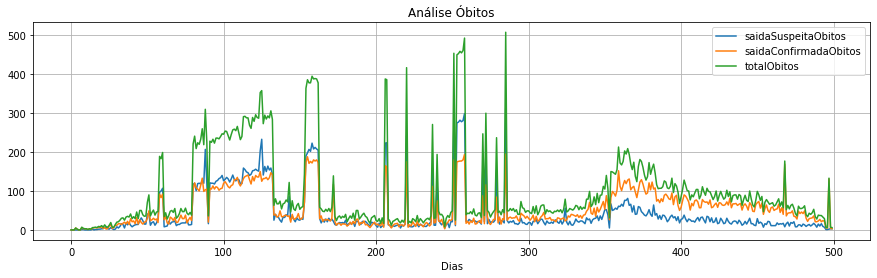

In [16]:
data_resumo[['saidaSuspeitaObitos','saidaConfirmadaObitos','totalObitos']].plot(figsize=(15, 4), xlabel='Dias', title='Análise Óbitos', grid=True)

C:\Users\andre\AppData\Local\Temp/ipykernel_9924/307581005.py:9: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  data_resumido.hist(bins=30, color='steelblue', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False, ax=ax)


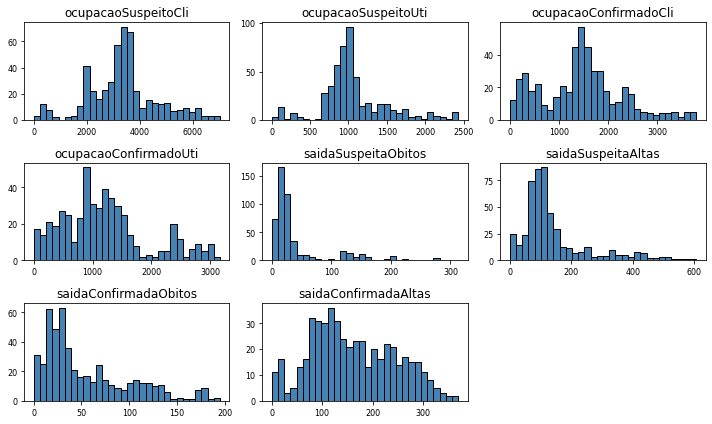

In [17]:
# Histograma dos dados
import matplotlib.pyplot as plt

figsize=(10,6)
fig, ax = plt.subplots(1, 1, figsize=figsize)

data_resumido = data_resumo.loc[1:,['ocupacaoSuspeitoCli','ocupacaoSuspeitoUti','ocupacaoConfirmadoCli','ocupacaoConfirmadoUti','saidaSuspeitaObitos','saidaSuspeitaAltas','saidaConfirmadaObitos','saidaConfirmadaAltas']]

data_resumido.hist(bins=30, color='steelblue', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False, ax=ax)    
plt.tight_layout() 

In [18]:
data_f = data_resumo[['dataNotif','ocupacaoSuspeitoCli','ocupacaoSuspeitoUti','ocupacaoConfirmadoCli','ocupacaoConfirmadoUti','saidaSuspeitaAltas','saidaConfirmadaAltas','estacao_inverno','estacao_outono','estacao_primavera','estacao_verao','totalObitos']]

In [19]:
data_f.describe()

,ocupacaoSuspeitoCli,ocupacaoSuspeitoUti,ocupacaoConfirmadoCli,ocupacaoConfirmadoUti,saidaSuspeitaAltas,saidaConfirmadaAltas,estacao_inverno,estacao_outono,estacao_primavera,estacao_verao,totalObitos
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,3350.234000,1063.358000,1451.408000,1188.422000,141.808000,160.716000,0.284000,0.350000,0.182000,0.184000,98.302000
std,1299.254586,421.255559,820.865186,735.695224,112.083489,83.349515,0.451388,0.477447,0.386231,0.387872,99.878236
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2645.250000,865.000000,938.250000,653.000000,78.000000,97.750000,0.000000,0.000000,0.000000,0.000000,36.750000
50%,3336.000000,997.500000,1449.000000,1098.000000,107.500000,148.000000,0.000000,0.000000,0.000000,0.000000,56.000000
75%,3780.000000,1194.250000,1860.250000,1492.250000,154.000000,227.000000,1.000000,1.000000,0.000000,0.000000,112.000000
max,7030.000000,2429.000000,3790.000000,3165.000000,607.000000,370.000000,1.000000,1.000000,1.000000,1.000000,508.000000


<h1>Normalizar os Dados<h1>

In [20]:
data_n = data_f.copy()

In [21]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [22]:
# aplicar normalização
column = 'ocupacaoSuspeitoCli'
data_n[column] = MinMaxScaler().fit_transform(np.array(data_n[column]).reshape(-1,1))
  
display(data_n)

,dataNotif,ocupacaoSuspeitoCli,ocupacaoSuspeitoUti,ocupacaoConfirmadoCli,ocupacaoConfirmadoUti,saidaSuspeitaAltas,saidaConfirmadaAltas,estacao_inverno,estacao_outono,estacao_primavera,estacao_verao,totalObitos
0,2020-01-04,0.015374,70.0,34.0,25.0,1,3,0.0,0.0,0.0,1.0,0
1,2020-02-07,0.001139,0.0,0.0,0.0,0,0,0.0,0.0,0.0,1.0,0
2,2020-03-20,0.000000,0.0,0.0,0.0,0,0,0.0,0.0,0.0,1.0,0
3,2020-04-01,0.052811,137.0,43.0,39.0,1,10,0.0,1.0,0.0,0.0,5
4,2020-04-02,0.048968,109.0,42.0,23.0,5,13,0.0,1.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
495,2021-08-06,0.525552,906.0,181.0,214.0,9,32,1.0,0.0,0.0,0.0,6
496,2021-08-07,0.417224,734.0,125.0,168.0,1,13,1.0,0.0,0.0,0.0,6
497,2021-08-08,0.406833,760.0,121.0,170.0,8,7,1.0,0.0,0.0,0.0,133
498,2021-08-09,0.468754,798.0,183.0,199.0,12,16,1.0,0.0,0.0,0.0,7


In [23]:
# aplicar normalização
column = 'ocupacaoSuspeitoUti'
data_n[column] = MinMaxScaler().fit_transform(np.array(data_n[column]).reshape(-1,1))

column = 'ocupacaoConfirmadoCli'
data_n[column] = MinMaxScaler().fit_transform(np.array(data_n[column]).reshape(-1,1))

column = 'ocupacaoConfirmadoUti'
data_n[column] = MinMaxScaler().fit_transform(np.array(data_n[column]).reshape(-1,1))
  
display(data_n)

,dataNotif,ocupacaoSuspeitoCli,ocupacaoSuspeitoUti,ocupacaoConfirmadoCli,ocupacaoConfirmadoUti,saidaSuspeitaAltas,saidaConfirmadaAltas,estacao_inverno,estacao_outono,estacao_primavera,estacao_verao,totalObitos
0,2020-01-04,0.015374,0.028818,0.008971,0.007899,1,3,0.0,0.0,0.0,1.0,0
1,2020-02-07,0.001139,0.000000,0.000000,0.000000,0,0,0.0,0.0,0.0,1.0,0
2,2020-03-20,0.000000,0.000000,0.000000,0.000000,0,0,0.0,0.0,0.0,1.0,0
3,2020-04-01,0.052811,0.056402,0.011346,0.012322,1,10,0.0,1.0,0.0,0.0,5
4,2020-04-02,0.048968,0.044874,0.011082,0.007267,5,13,0.0,1.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
495,2021-08-06,0.525552,0.372993,0.047757,0.067615,9,32,1.0,0.0,0.0,0.0,6
496,2021-08-07,0.417224,0.302182,0.032982,0.053081,1,13,1.0,0.0,0.0,0.0,6
497,2021-08-08,0.406833,0.312886,0.031926,0.053712,8,7,1.0,0.0,0.0,0.0,133
498,2021-08-09,0.468754,0.328530,0.048285,0.062875,12,16,1.0,0.0,0.0,0.0,7


In [24]:
# aplicar normalização
column = 'saidaSuspeitaAltas'
data_n[column] = MinMaxScaler().fit_transform(np.array(data_n[column]).reshape(-1,1))

column = 'saidaConfirmadaAltas'
data_n[column] = MinMaxScaler().fit_transform(np.array(data_n[column]).reshape(-1,1))

display(data_n)

,dataNotif,ocupacaoSuspeitoCli,ocupacaoSuspeitoUti,ocupacaoConfirmadoCli,ocupacaoConfirmadoUti,saidaSuspeitaAltas,saidaConfirmadaAltas,estacao_inverno,estacao_outono,estacao_primavera,estacao_verao,totalObitos
0,2020-01-04,0.015374,0.028818,0.008971,0.007899,0.001647,0.008108,0.0,0.0,0.0,1.0,0
1,2020-02-07,0.001139,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0
2,2020-03-20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0
3,2020-04-01,0.052811,0.056402,0.011346,0.012322,0.001647,0.027027,0.0,1.0,0.0,0.0,5
4,2020-04-02,0.048968,0.044874,0.011082,0.007267,0.008237,0.035135,0.0,1.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
495,2021-08-06,0.525552,0.372993,0.047757,0.067615,0.014827,0.086486,1.0,0.0,0.0,0.0,6
496,2021-08-07,0.417224,0.302182,0.032982,0.053081,0.001647,0.035135,1.0,0.0,0.0,0.0,6
497,2021-08-08,0.406833,0.312886,0.031926,0.053712,0.013180,0.018919,1.0,0.0,0.0,0.0,133
498,2021-08-09,0.468754,0.328530,0.048285,0.062875,0.019769,0.043243,1.0,0.0,0.0,0.0,7


C:\Users\andre\AppData\Local\Temp/ipykernel_9924/1589129956.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  data_resumido.hist(bins=50, color='steelblue', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False, ax=ax)


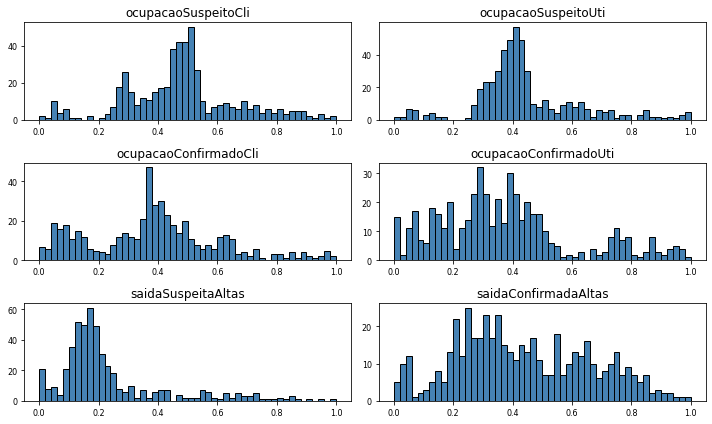

In [25]:
figsize=(10,6)
fig, ax = plt.subplots(1, 1, figsize=figsize)

data_resumido = data_n.loc[1:,['ocupacaoSuspeitoCli','ocupacaoSuspeitoUti','ocupacaoConfirmadoCli','ocupacaoConfirmadoUti','saidaSuspeitaAltas','saidaConfirmadaAltas']]

data_resumido.hist(bins=50, color='steelblue', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False, ax=ax)    
plt.tight_layout() 

In [26]:
data_n.describe()

,ocupacaoSuspeitoCli,ocupacaoSuspeitoUti,ocupacaoConfirmadoCli,ocupacaoConfirmadoUti,saidaSuspeitaAltas,saidaConfirmadaAltas,estacao_inverno,estacao_outono,estacao_primavera,estacao_verao,totalObitos
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.476190,0.437776,0.382957,0.375489,0.233621,0.434368,0.284000,0.350000,0.182000,0.184000,98.302000
std,0.184947,0.173428,0.216587,0.232447,0.184652,0.225269,0.451388,0.477447,0.386231,0.387872,99.878236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.375836,0.356114,0.247559,0.206319,0.128501,0.264189,0.000000,0.000000,0.000000,0.000000,36.750000
50%,0.474164,0.410663,0.382322,0.346919,0.177100,0.400000,0.000000,0.000000,0.000000,0.000000,56.000000
75%,0.537367,0.491663,0.490831,0.471485,0.253707,0.613514,1.000000,1.000000,0.000000,0.000000,112.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,508.000000


<h1>Multi-layer Perceptron Regressor<h1>

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor 

In [28]:
# transformar data em dias
data_r = data_n.copy()
data_r['dias'] = range(1,len(data_r) + 1,1)
data_r.drop(columns=['dataNotif'], inplace=True)

In [29]:
X = data_r[['dias','ocupacaoSuspeitoCli','ocupacaoSuspeitoUti','ocupacaoConfirmadoCli','ocupacaoConfirmadoUti','saidaSuspeitaAltas','saidaConfirmadaAltas','estacao_inverno','estacao_outono','estacao_primavera','estacao_verao']]
y = data_r[['totalObitos']]
X.head()

,dias,ocupacaoSuspeitoCli,ocupacaoSuspeitoUti,ocupacaoConfirmadoCli,ocupacaoConfirmadoUti,saidaSuspeitaAltas,saidaConfirmadaAltas,estacao_inverno,estacao_outono,estacao_primavera,estacao_verao
0,1,0.015374,0.028818,0.008971,0.007899,0.001647,0.008108,0.0,0.0,0.0,1.0
1,2,0.001139,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
2,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
3,4,0.052811,0.056402,0.011346,0.012322,0.001647,0.027027,0.0,1.0,0.0,0.0
4,5,0.048968,0.044874,0.011082,0.007267,0.008237,0.035135,0.0,1.0,0.0,0.0


In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.15)

mlp = MLPRegressor(hidden_layer_sizes=(100,100,100),activation='relu',max_iter=1800, shuffle=False)
mlp.fit( X_train, y_train )

print("Rede Neural")
print("Acurácia na base de treinamento: {:.2f}".format(mlp.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(mlp.score(X_test, y_test)))

Rede Neural
Acurácia na base de treinamento: 0.94
Acurácia na base de teste: 0.92


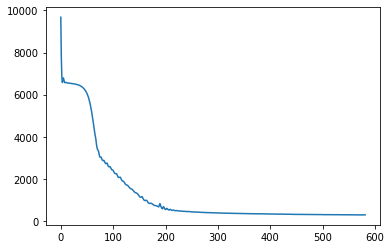

In [77]:
plt.plot(mlp.loss_curve_)
plt.show()

In [78]:
mlp.best_loss_

287.8093480386133

In [79]:
# realizar predição baseando-se em um conjunto de testes
y_pred = mlp.predict(X_test)

In [80]:
pd_pred = pd.DataFrame(y_pred, columns=['Predição'])
pd_pred.head()

,Predição
0,34.629987
1,431.627199
2,49.802844
3,110.217257
4,66.374644


In [81]:
y_teste = pd.DataFrame(y_test)
y_teste.reset_index(inplace=True)
y_teste.drop(columns=['index'], inplace=True)
y_teste.head()

,totalObitos
0,36
1,453
2,52
3,100
4,61


In [82]:
df_compara = y_teste.join(pd_pred)

In [ ]:
df_compara.head(25)

<AxesSubplot:title={'center':'Análise Preditiva - MLPRegressor'}, xlabel='Dias'>

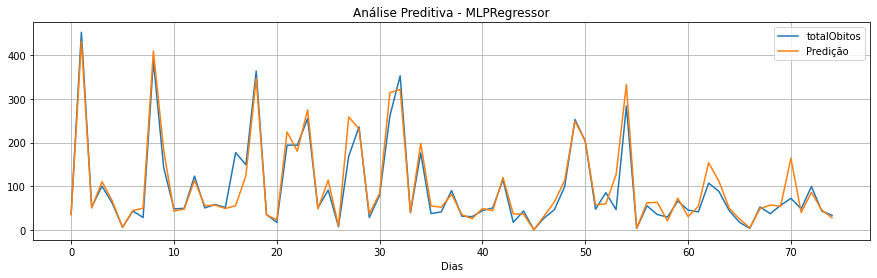

In [84]:
df_compara[['totalObitos','Predição']].plot(figsize=(15, 4), xlabel='Dias', title='Análise Preditiva - MLPRegressor', grid=True)

In [85]:
from sklearn.metrics import mean_squared_error, r2_score

print("Erro médio quadrático: ",mean_squared_error(y_teste,y_pred))
print("R^2 Score: ", r2_score(y_teste,y_pred))

Erro médio quadrático:  774.291774325213
R^2 Score:  0.9180108004698938


<h1>Usando GridSearch<h1>

In [105]:
from sklearn.model_selection import GridSearchCV
import itertools
np.set_printoptions(precision=2)
%matplotlib inline

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=123)
print('Train/Test Sizes : ', X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Train/Test Sizes :  (400, 11) (100, 11) (400, 1) (100, 1)


In [106]:
params = {'activation': ['relu', 'tanh', 'logistic', 'identity'],
          'hidden_layer_sizes': list(itertools.permutations([50,100,150],2)) + list(itertools.permutations([50,100,150],3)) + [50,100,150],
          'solver': ['adam', 'lbfgs'],
          'learning_rate' : ['constant', 'adaptive', 'invscaling'],
          'max_iter' : [1800]
         }

In [107]:
%%time

mlp_regressor_grid = GridSearchCV(MLPRegressor(random_state=123), param_grid=params, n_jobs=-1, cv=5, verbose=5)
mlp_regressor_grid.fit(X_train,y_train)

print('Train R^2 Score : %.3f'%mlp_regressor_grid.best_estimator_.score(X_train, y_train))
print('Test R^2 Score : %.3f'%mlp_regressor_grid.best_estimator_.score(X_test, y_test))
print('Best R^2 Score Through Grid Search : %.3f'%mlp_regressor_grid.best_score_)
print('Best Parameters : ',mlp_regressor_grid.best_params_)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Train R^2 Score : 0.969
Test R^2 Score : 0.953
Best R^2 Score Through Grid Search : 0.949
Best Parameters :  {'activation': 'tanh', 'hidden_layer_sizes': (150, 100), 'learning_rate': 'constant', 'max_iter': 1800, 'solver': 'lbfgs'}
Wall time: 1h 54min 18s
